In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import Time series Data :Air Passengers Traffic


In [2]:
data = pd.read_csv("airline-passenger-traffic.csv", header=None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')

In [3]:
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


### Time series Analysis

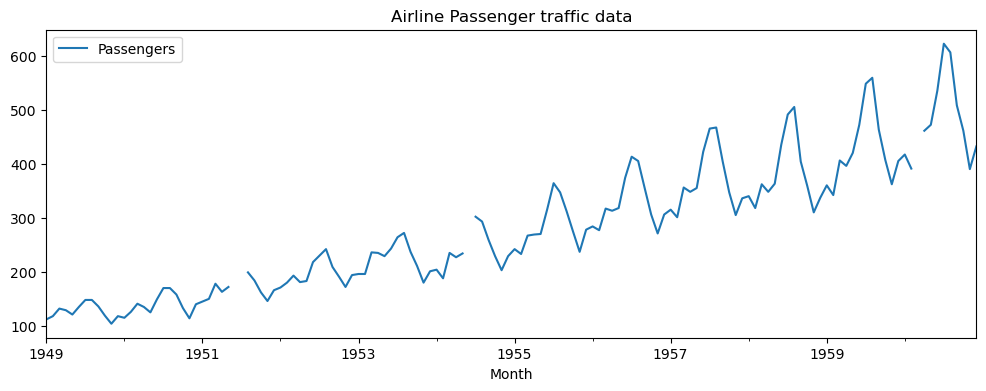

In [4]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger traffic data')
plt.show(block=False)

# Missing Value Treatment

## Mean Imputation

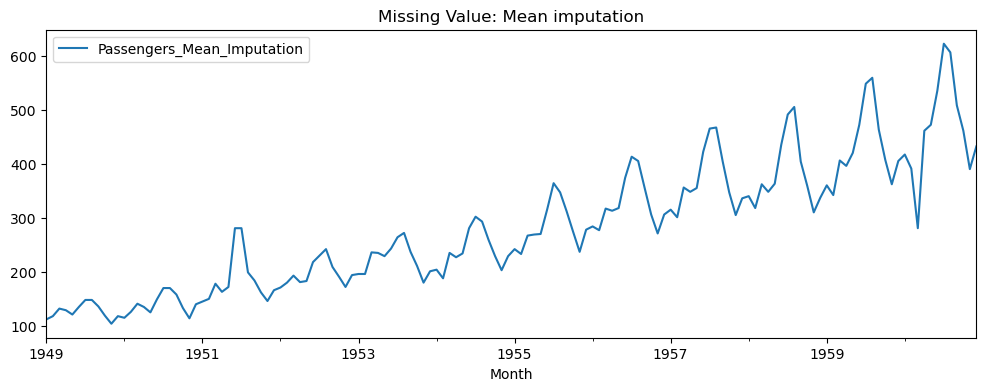

In [5]:
data = data.assign(Passengers_Mean_Imputation = data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Mean imputation')
plt.show(block=False)

## Linear Interpolation

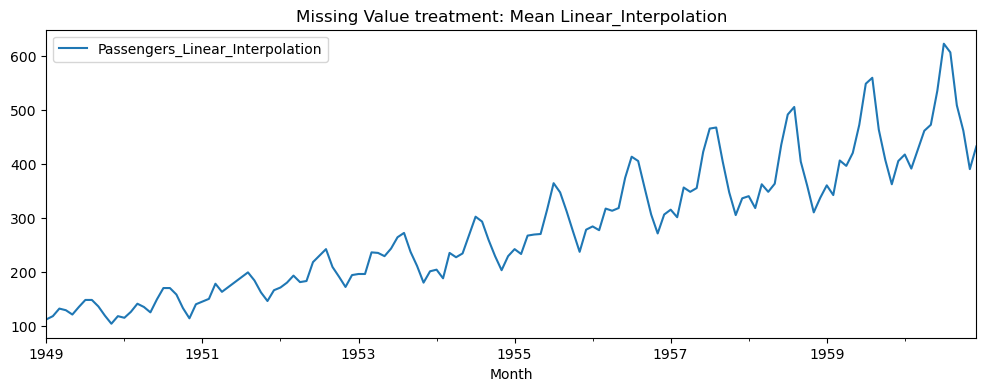

In [6]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value treatment: Mean Linear_Interpolation')
plt.show(block=False)

Use Linear Interpolation to impute missing values

In [64]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

## Outlier Detection

- Box Plot and Interquartile Range

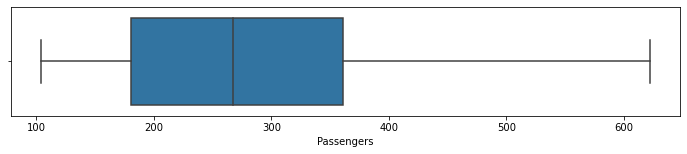

In [65]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

## Histogram

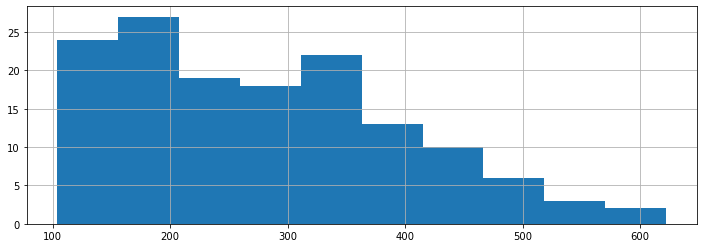

In [66]:
fig = data.Passengers.hist(figsize=(12,4))

# Time Series Decomposition

### Additive Seasonal Decomposition

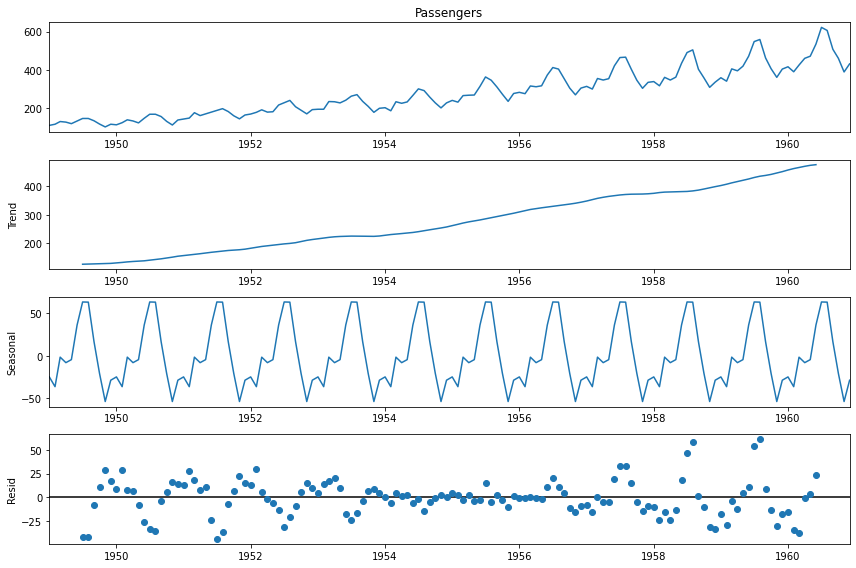

In [67]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] =12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model ='additive')
fig = decomposition.plot()
plt.show()

# Multiplicative Seasonal Decomposition

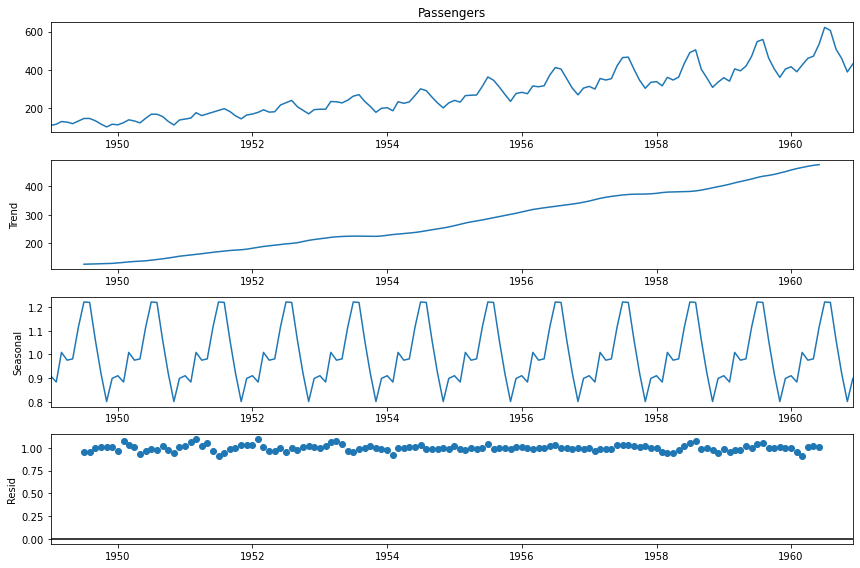

In [68]:

decomposition = sm.tsa.seasonal_decompose(data.Passengers, model ='multiplicative')
fig = decomposition.plot()
plt.show()

In [69]:
matrail = pd.read_csv('Metrail+dataset.csv')
matrail.columns = ['Month','Travellers']
matrail = matrail.set_index('Month')

In [70]:
matrail.head()

,Travellers
Month,
Jan-91,1724.0
Feb-91,1638.0
Mar-91,1987.0
Apr-91,1825.0
May-91,NaN


In [71]:
matrail = matrail.assign(matrail_Linear_Interpolation = matrail.Travellers.interpolate(method='linear'))

In [72]:
matrail.Travellers.mean()

1837.5472972972973

In [73]:
matrail['Travellers'] = matrail['matrail_Linear_Interpolation']

In [74]:
matrail.Travellers.mean()

1836.566037735849

# Build and evaluate time series forecast

### Splitting time series into training and test sets

In [99]:
train_len = 120
train =data[0:train_len]
test = data[train_len:]

Naive Forecast Method


In [76]:
y_hat_naive = test.copy()
y_hat_naive["naive_forecast"] = train["Passengers"][train_len-1]

## Plot Train, Test and Forecast

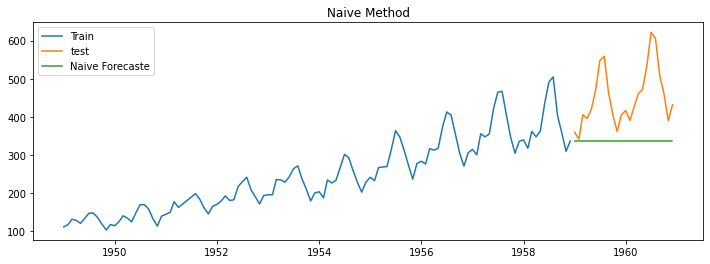

In [77]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_naive["naive_forecast"], label='Naive Forecaste')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

# Simple Average Method

In [78]:
y_hat_avg = test.copy()
y_hat_avg["avg_forecast"] = train["Passengers"].mean()

# Plot Train, Test and Forecast


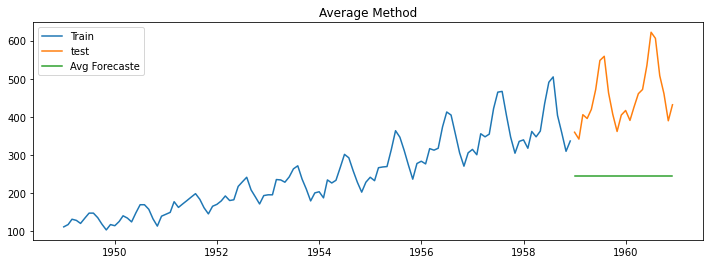

In [79]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_avg["avg_forecast"], label='Avg Forecaste')
plt.legend(loc='best')
plt.title('Average Method')
plt.show()

# Calculate RMSE and MAPE to evaluate forecast

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = results[['Method','RMSE','MAPE']]

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


In [85]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28


# Sample Data

In [87]:
dataset =  pd.read_csv('exchange-rate-twi.csv')

In [88]:
dataset.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [89]:
train_len1 = 212
train =dataset[0:train_len1]
test = dataset[train_len1:]

In [42]:
y_hat_naive = test.copy()
y_hat_naive["naive_forecast"] = train["Exchange Rate TWI"][train_len-1]

In [43]:
y_hat_avg = test.copy()
y_hat_avg["avg_forecast"] = train["Exchange Rate TWI"].mean()

In [45]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)

results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = results[['Method','RMSE','MAPE']]

results

,Method,RMSE,MAPE
0,Naive Method,5.98,8.41


In [46]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,5.98,8.41
0,Simple Average Method,32.42,58.12


# Simple Moving Average Method

In [50]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma["sma_forecast"] = data["Passengers"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len-1]

## Plot train, test and forecast

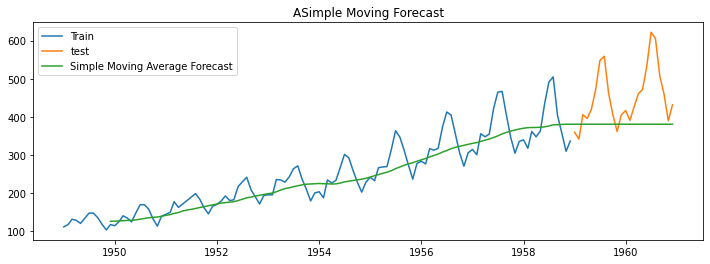

In [52]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_sma["sma_forecast"], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('ASimple Moving Forecast')
plt.show()

In [86]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54


In [93]:
y_hat_smaw = dataset.copy()
ma_window = 6
y_hat_smaw["sma_forecast"] = dataset["Exchange Rate TWI"].rolling(ma_window).mean()
y_hat_smaw["sma_forecast"][train_len1:] = y_hat_smaw["sma_forecast"][train_len1-1]

In [94]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_smaw['sma_forecast'][train_len1:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_smaw['sma_forecast'][train_len1:])/test['Exchange Rate TWI'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13


# Simple Exponential Smoothing

In [97]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [101]:
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

## Plot traiin, train and forecast

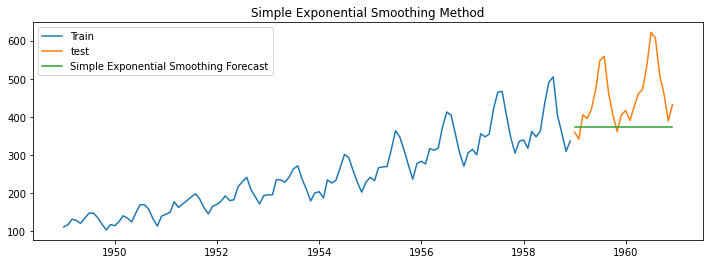

In [105]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_ses["ses_forecast"], label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [106]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49


# Holts' Exponential Smoothing Method with Trend

In [109]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [111]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 112.0, 'initial_trend': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


# Plot train, test and forecast

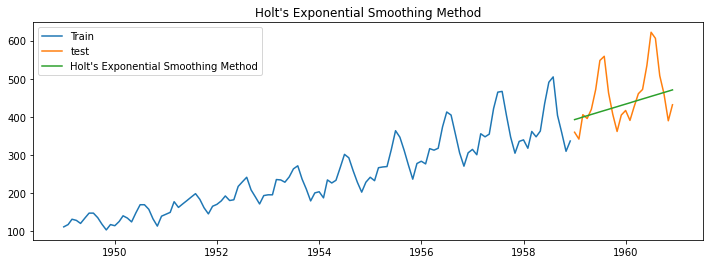

In [114]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_holt["holt_forecast"], label="Holt\'s Exponential Smoothing Method")
plt.legend(loc='best')
plt.title("Holt\'s Exponential Smoothing Method")
plt.show()

# Calculate RMSE and MAPE

In [116]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Holt\'s Exponential Smoothing Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11


# Holts's Winters Exponential Smoothing Additive Method with trend and seasonality

In [117]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.23607200025884081, 'smoothing_trend': 9.813499767147138e-07, 'smoothing_seasonal': 0.7639161728276643, 'damping_trend': nan, 'initial_level': 205.03150903149617, 'initial_trend': 2.2765042585302533, 'initial_seasons': array([ -95.32069588,  -89.80230793,  -77.2788778 ,  -82.3509637 ,
        -91.0482189 ,  -76.91378269,  -64.64467761,  -66.54522518,
        -80.61285763,  -99.44737851, -114.14449582,  -98.033036  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


# Plot train, test and forecast

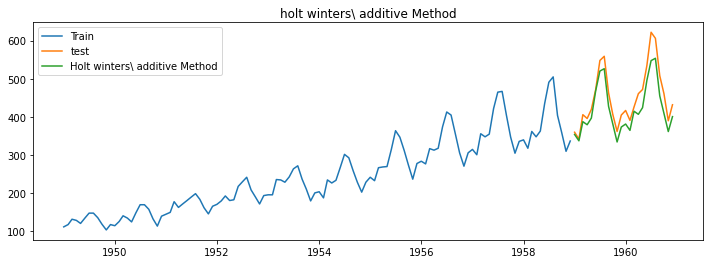

In [119]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_hwa["hwa_forecast"], label="Holt winters\ additive Method")
plt.legend(loc='best')
plt.title("holt winters\ additive Method")
plt.show()

# Calculate RMSE and MAPE

In [120]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Holt winters\ additive Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11
0,Holt winters\ additive Method,35.87,6.72


In [121]:
y_hat_hwam = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, trend='mul', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwam['hwam_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3863485446279185, 'smoothing_trend': 4.329736349465844e-06, 'smoothing_seasonal': 0.6136509324625324, 'damping_trend': nan, 'initial_level': 189.04572224122026, 'initial_trend': 1.0096630518697118, 'initial_seasons': array([0.58678074, 0.61989462, 0.68445887, 0.6491773 , 0.59528602,
       0.6518289 , 0.71159765, 0.70740164, 0.64331154, 0.55749694,
       0.49380668, 0.57606049]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


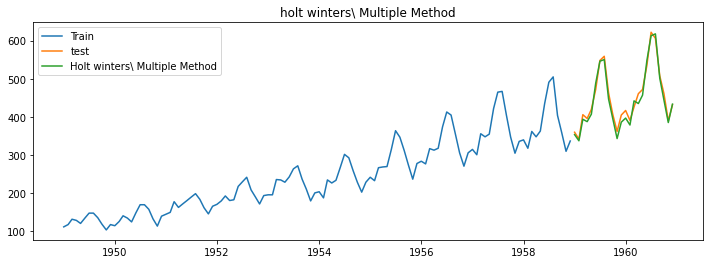

In [122]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_hwam["hwam_forecast"], label="Holt winters\ Multiple Method")
plt.legend(loc='best')
plt.title("holt winters\ #Multiple Method")
plt.show()

In [123]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_hwam['hwam_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwam['hwam_forecast'])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Holt winters\ Multiple Method'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11
0,Holt winters\ additive Method,35.87,6.72
0,Holt winters\ Multiple Method,13.36,2.71


# Auto Regressive Models

## Stationary vs non-stationary time series

### Time series Plot

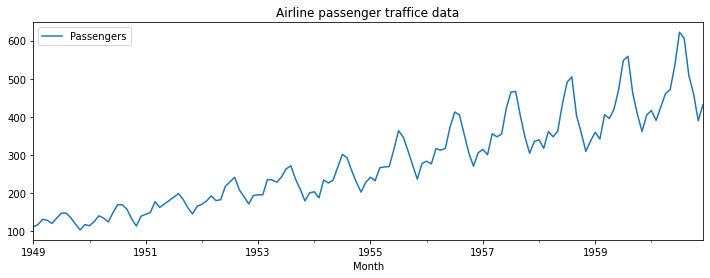

In [126]:
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline passenger traffice data')
plt.show()

### Augmented Dickey-Fuller(ADF) Test

In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
adf_test = adfuller(data['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f:' % adf_test[1])

ADF Statistic: 0.894609
Critical value @ 0.05: -2.88
p-value: 0.993020:


# KPSS Test

In [132]:
from statsmodels.tsa.stattools import kpss

In [134]:
kpss_test = kpss(data['Passengers'])

print('kpss Statistic: %f' % kpss_test[0])
print('Critical value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f:' % kpss_test[1])

kpss Statistic: 1.052050
Critical value @ 0.05: 0.46
p-value: 0.010000:


In [135]:
# For Exchange Rate Data wit ADF
adf_test1 = adfuller(dataset['Exchange Rate TWI'])

print('ADF Statistic: %f' % adf_test1[0])
print('Critical value @ 0.05: %.2f' % adf_test1[4]['5%'])
print('p-value: %f:' % adf_test1[1])

ADF Statistic: -0.805468
Critical value @ 0.05: -2.87
p-value: 0.817511:


In [137]:
kpss_test1 = kpss(dataset['Exchange Rate TWI'])

print('kpss Statistic: %f' % kpss_test1[0])
print('Critical value @ 0.05: %.2f' % kpss_test1[3]['5%'])
print('p-value: %f:' % kpss_test1[1])

kpss Statistic: 1.725897
Critical value @ 0.05: 0.46
p-value: 0.010000:


# BOX COX Tranformation

In [147]:
from scipy.stats import boxcox

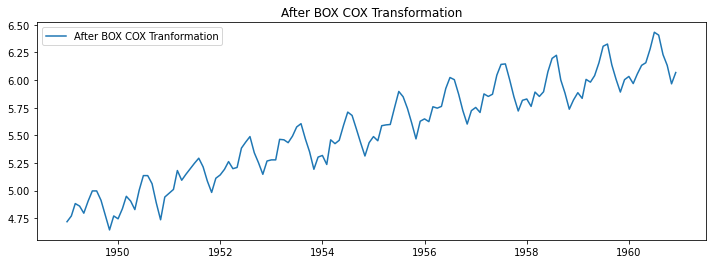

In [149]:
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda = 0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label="After BOX COX Tranformation")
plt.legend(loc='best')
plt.title('After BOX COX Transformation')
plt.show()

# Differencing

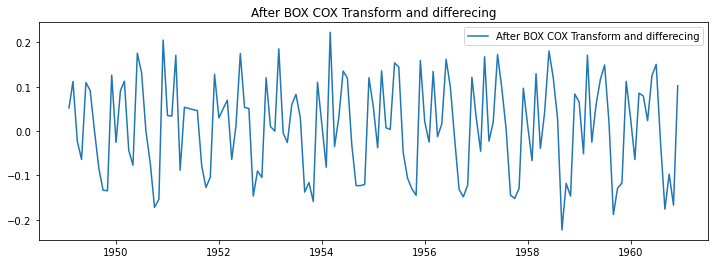

In [153]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize =(12,4))
plt.plot(data_boxcox_diff, label = 'After BOX COX Transform and differecing')
plt.legend(loc='best')
plt.title('After BOX COX Transform and differecing')
plt.show()


# ADF Test

In [155]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f:' % adf_test[1])

ADF Statistic: -3.290114
Critical value @ 0.05: -2.88
p-value: 0.015326:


In [156]:
kpss_test1 = kpss(data_boxcox_diff)

print('kpss Statistic: %f' % kpss_test1[0])
print('Critical value @ 0.05: %.2f' % kpss_test1[3]['5%'])
print('p-value: %f:' % kpss_test1[1])

kpss Statistic: 0.101871
Critical value @ 0.05: 0.46
p-value: 0.100000:


# Autocorrelation Function (ACF) Plot

In [158]:
from statsmodels.graphics.tsaplots import plot_acf

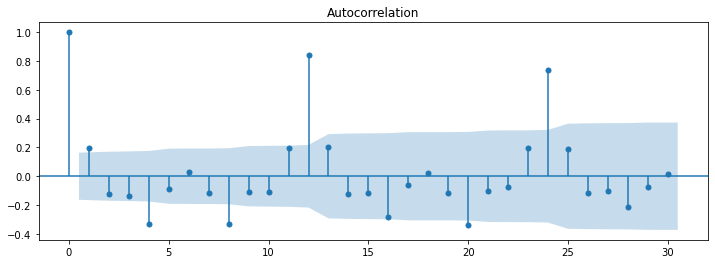

In [161]:
plt.figure(figsize = (12,4))

plot_acf(data_boxcox_diff, ax = plt.gca(), lags=30)
plt.show()

# Partial autocorrelation Function (PACF) plot

In [165]:
from statsmodels.graphics.tsaplots import plot_pacf

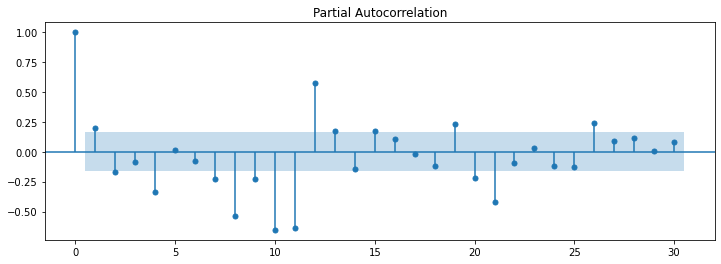

In [166]:
plt.figure(figsize = (12,4))

plot_pacf(data_boxcox_diff, ax = plt.gca(), lags=30)
plt.show()

# Split into training and test data sets

In [167]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# Auto Regression Method (AR)

In [169]:
from statsmodels.tsa.arima_model import ARIMA

In [171]:
model = ARIMA(train_data_boxcox_diff, order= (1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009477
ar.L1.y    0.183116
dtype: float64


### Remover original time series forecast

In [174]:
y_hat_ar = data_boxcox_diff.copy()

y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())

y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0]) 

y_hat_ar['ar_forecast_boxcox'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot Train, test and forecast

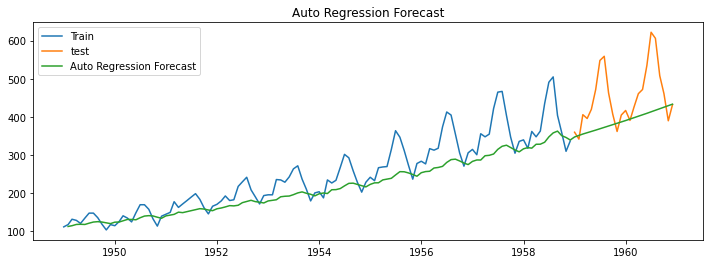

In [176]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_ar["ar_forecast_boxcox"], label="Auto Regression Forecast")
plt.legend(loc='best')
plt.title("Auto Regression Forecast")
plt.show()

In [180]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ar['ar_forecast_boxcox'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast_boxcox'][test.index.min():])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Auto Regression Forecast'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11
0,Holt winters\ additive Method,35.87,6.72
0,Holt winters\ Multiple Method,13.36,2.71


# Moving Average Method (MA)

In [182]:
model = ARIMA(train_data_boxcox_diff, order = (0,0,1))

model_fit = model.fit()

print(model_fit.params)

const      0.009538
ma.L1.y    0.266103
dtype: float64


## Remover original time series forecast

In [185]:
y_hat_ma = data_boxcox_diff.copy()

y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())

y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0]) 

y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, Test and Forecast

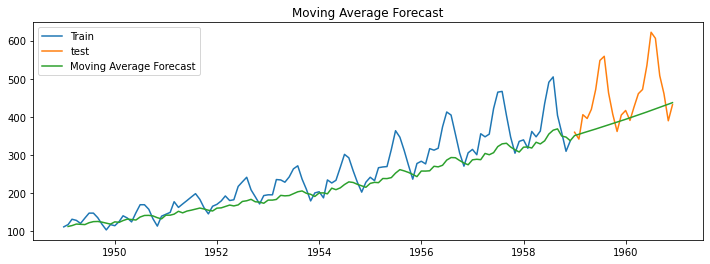

In [187]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_ma["ma_forecast"], label="Moving Average Forecast")
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.show()

In [188]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Moving Average Forecast'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11
0,Holt winters\ additive Method,35.87,6.72
0,Holt winters\ Multiple Method,13.36,2.71


# Auto regressive moving average (ARMA) Method

In [189]:
model = ARIMA(train_data_boxcox_diff, order = (1,0,1))

model_fit = model.fit()

print(model_fit.params)

const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: float64


### Remover original time series forecast

In [190]:
y_hat_arma = data_boxcox_diff.copy()

y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())

y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0]) 

y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

## Plot Train, Test and Forecast

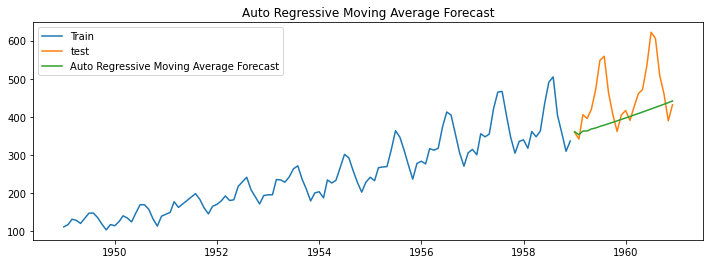

In [194]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_arma["arma_forecast"][test.index.min():], label="Auto Regressive Moving Average Forecast")
plt.legend(loc='best')
plt.title("Auto Regressive Moving Average Forecast")
plt.show()

In [192]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Auto Regressive Moving Average Forecast'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11
0,Holt winters\ additive Method,35.87,6.72
0,Holt winters\ Multiple Method,13.36,2.71


# `Auto Regressive Integrated Moving Average (ARIMA)

In [195]:
model = ARIMA(train_data_boxcox, order = (1,1,1))

model_fit = model.fit()

print(model_fit.params)

const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtype: float64


## Remover original time series forecast

In [196]:
y_hat_arima = data_boxcox_diff.copy()

y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())

y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()

y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0]) 

y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot Train, Test and Forecast

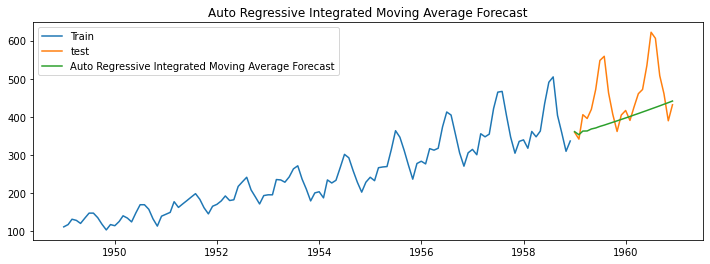

In [197]:
plt.figure(figsize =(12,4))
plt.plot(train["Passengers"], label='Train')
plt.plot(test["Passengers"], label='test')
plt.plot(y_hat_arima["arima_forecast"][test.index.min():], label="c Forecast")
plt.legend(loc='best')
plt.title("Auto Regressive Integrated Moving Average Forecast")
plt.show()

In [198]:
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempresults = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average Forecast'], 'MAPE':[mape], 'RMSE':[rmse]})

results = pd.concat([results,tempresults])

results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Average Method,219.69,44.28
0,Simple Moving Average Method,103.33,15.54
0,Simple Moving Average Method,4.66,6.96
0,Simple Moving Average Method,4.90,7.13
0,Simple Exponential Smoothing,107.65,16.49
0,Holt's Exponential Smoothing Method,71.94,11.11
0,Holt winters\ additive Method,35.87,6.72
0,Holt winters\ Multiple Method,13.36,2.71


In [ ]:
k